## 0 Importing Libraries

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1
Load the data file and explore the data, showing size, data descriptions,
data distributions with boxplot, and correlation between columns

In [23]:
path = '/content/drive/MyDrive/ml_python_labexam_2023_02_03.csv'
df = pd.read_csv(path, sep = ',')

In [24]:
df.shape

(1000, 11)

In [25]:
df.describe(include = 'all')

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000127,0.000297,-0.000421,3.378287e-01,2.521912e-01,0.000364,-0.000191,0.000553,0.000130,0.000524,0.437747
std,0.023475,0.018878,0.019124,2.952473e-01,2.877240e-01,0.017402,0.019349,0.017783,0.018999,0.025391,2.407762
min,-0.074550,-0.055749,-0.063489,9.531015e-07,6.913766e-10,-0.054694,-0.058531,-0.054578,-0.062925,-0.073059,-6.609545
25%,-0.015763,-0.012357,-0.013722,6.778294e-02,1.552023e-02,-0.011251,-0.013393,-0.011797,-0.012001,-0.018202,-1.200759
50%,0.000446,0.000269,-0.000891,2.638645e-01,1.218160e-01,0.000675,-0.000333,0.000422,-0.000858,-0.000219,0.336424
75%,0.015529,0.013924,0.012571,5.712697e-01,4.295876e-01,0.012217,0.012797,0.012697,0.012722,0.018642,2.175038
max,0.079599,0.073114,0.052593,9.996939e-01,9.988956e-01,0.053673,0.051803,0.049480,0.061867,0.081461,7.915506


I did 2 box plot to observe better the boxplot.<br>
I used this boxplots because using the boxplot with features and target features does not give so much information because the range of value of target feature is a different from the others. <br>
The range of the features is more or less 0;1. The target features has not this scale of values.

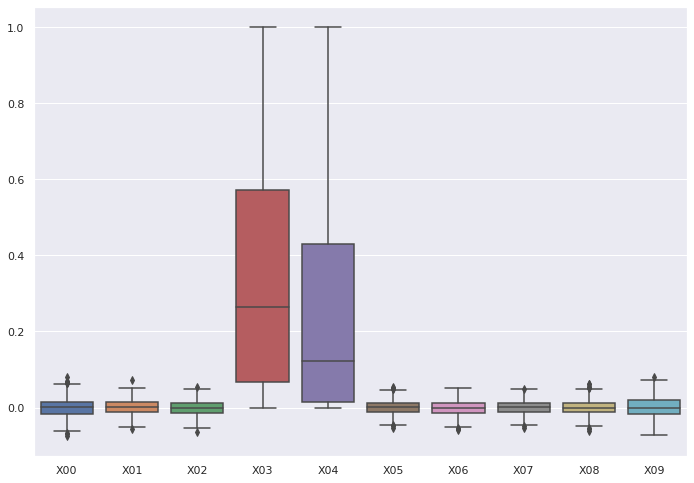

In [38]:
df1 = df.drop('y', axis = 1)
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data = df1)

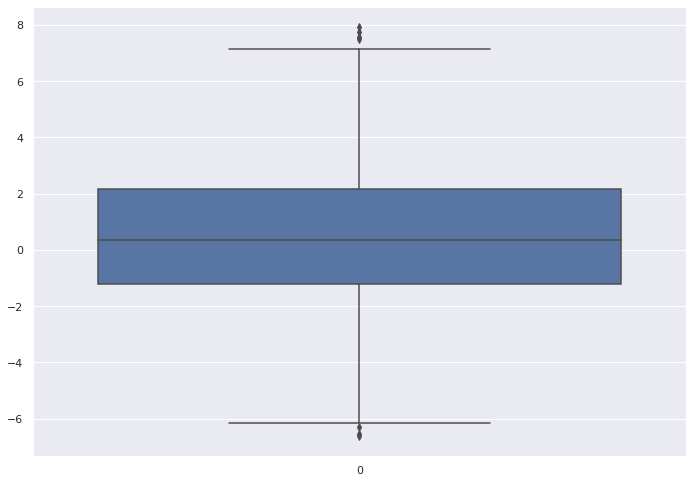

In [34]:
sns.boxplot(data = df['y'])

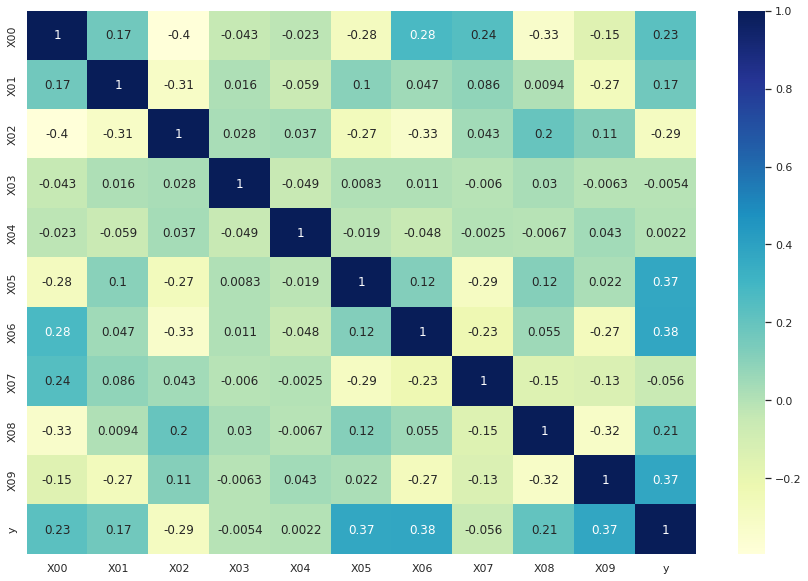

In [35]:
corr = df[df.columns].corr()
plt.figure(figsize=(15,10)) # set X and Y size
sns.heatmap(corr, cmap="YlGnBu", annot=True);

## 2 
Comment the exploration of step 1 pointing out if there are predicting
columns having the absolute value of correlation with the target less
than 0.15

All the features excepet X2 and X3 have the outlier below and under the quartiles.
Observing the Correlation (metric used is Pearson Correlation),  it is possbile to notice that the features with an absolute value less than 0.15 are: X03,X04,X07.
So,in the point 4 we can drop it, because they have a little correlation with the target feature.

## 3
train test a multivariate linear regressor and show the Root Mean
Squared Error

## Train test split

In [70]:
target = "y"
X = df.drop(target,axis = 1)
y = df[target]

In [71]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = random_state, train_size= 0.7)
print("Training set and test set have {} and {} elements respectively".format(Xtrain.shape[0], Xtest.shape[0]))

Training set and test set have 700 and 300 elements respectively


## Using multivariate linear regression

In [72]:
model_multi = linear_model.LinearRegression()
model_multi.fit(Xtrain, ytrain)
ytest_model_multi = model_multi.predict(Xtest)
rmse_multi = mean_squared_error(ytest, ytest_model_multi, squared=True)
print("Root mean squared error ",round(rmse_multi,2))

Root mean squared error  0.8


## 4
train test a multivariate linear regressor on the reduced dataset obtained
dropping the columns loosely correlated with the target, and show the
Root Mean Squared Error

In [73]:
to_drop = ['X03','X04','X07']
df1 = df.drop(to_drop, axis = 1)

In [74]:
X = df1.drop(target,axis = 1)
y = df1[target]

In [75]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = random_state, train_size= 0.7)
print("Training set and test set have {} and {} elements respectively".format(Xtrain.shape[0], Xtest.shape[0]))

Training set and test set have 700 and 300 elements respectively


In [76]:
model_best = linear_model.LinearRegression()
model_best.fit(Xtrain, ytrain)
ytest_model_best = model_best.predict(Xtest)
rmse_model_best = mean_squared_error(ytest, ytest_model_best, squared=True)
print("Root mean squared error ",round(rmse_model_best,2))

Root mean squared error  1.07


## 5
train and test on the reduced dataset a decision tree regressor, and show
the Root Mean Squared Error

In [77]:
model_tree = DecisionTreeRegressor(random_state = random_state)
model_tree.fit(Xtrain, ytrain)
ytrain_tree = model_tree.predict(Xtrain)
fitted_max_depth = model_tree.tree_.max_depth
print("The maximum depth of the full Decision Tree Regressor is ", fitted_max_depth)

The maximum depth of the full Decision Tree Regressor is  20


In [78]:
ytest_tree_model = model_tree.predict(Xtest)
rmse_dt = mean_squared_error(ytest, ytest_tree_model, squared = True)
print("Decision Tree Regression - RMSE = {:.2f}".format(rmse_dt))

Decision Tree Regression - RMSE = 4.56


## 6 Optimizing regression tree
optimise the depth of the decision tree regressor of step 5 searching for
the minimum Root Mean Squared Error with cross-validation, and show
the best RMSE

In [79]:

param_grid = {'max_depth': list(range(1,fitted_max_depth))}
# create the grid search cross validation object
dt_gscv = GridSearchCV(estimator=DecisionTreeRegressor(random_state=random_state)
                    , param_grid=param_grid
                    , scoring='neg_root_mean_squared_error' # select model with minimum mse
                    )
dt_gscv.fit(Xtrain,ytrain);
dt_best = dt_gscv.best_estimator_ # the GridSearchCV returns the best estimator
best_max_depth = dt_best.tree_.max_depth
print("The optimal maximum depth for the decision tree is {}".format(best_max_depth))

The optimal maximum depth for the decision tree is 9


In [80]:
ytest_tree_best_model = dt_gscv.predict(Xtest)
rmse_dt = mean_squared_error(ytest, ytest_tree_best_model, squared = True)
print("Decision Tree Regression - RMSE = {:.2f}".format(rmse_dt))

Decision Tree Regression - RMSE = 4.54


## Comment the results
Using a regressor like a tree the performance of the metric root mean squared error increased a lot.
With the first experiment we can observed that using the features with a low correlation, the result of the metric decreased. Dropping the columns with a low correlation the multivariate system has better performance.<br>
The fit of hyperparameters using cross validation does not have an improvment but only a simplification of the model.